[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/delta/blob/master/exercises/tut1_recap_bads_student.ipynb)

# BADS Recap: Predictive Modeling

In this exercise, you recapitulate the principles of predictive modeling. You will build a predictive model for a travel 
insurance, which predicts whether a given insurance offer leads to a claim. You can use "Ex03-Python_Machine_Learning.ipynb" 
to lookup on the model building procedure and the required commands in python. 

In the next cells, we provide the code for importing required packages and for loading the data set (You need to adapt the
path to the data.). Afterwards, the exercises begin.  

In [1]:
# load required packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay

In [2]:
# read data
trav_ins = pd.read_csv('travel insurance.csv')

In [3]:
# get to know the data
trav_ins

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


**Exercise 1:**<br>
Impute missing values with an approach of your own choice.

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


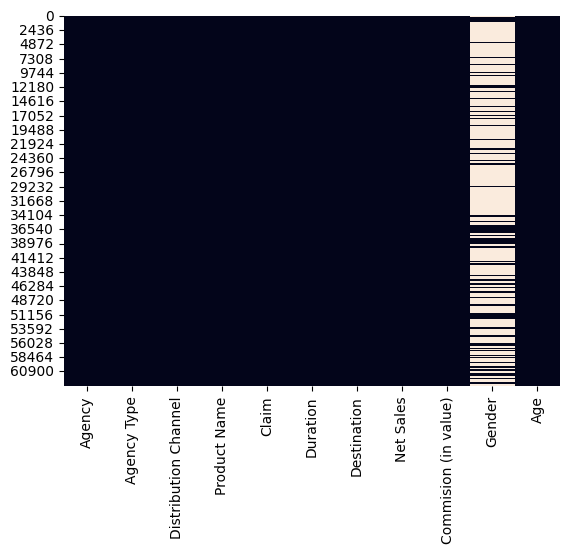

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64


In [8]:
isnull = trav_ins.isnull().sum()
print(isnull)
#create a heatmap to show the missing values    
sns.heatmap(trav_ins.isnull(), cbar=False)
plt.show()
# drop the missing values
# trav_ins = trav_ins.dropna()

# check the data types
# trav_ins.dtypes

trav_ins['Gender'] = trav_ins['Gender'].fillna('Unknown')
isnull = trav_ins.isnull().sum()
print(isnull)


**Exercise 2:**<br>
Appropriately encode the target "Claim".

In [9]:
trav_ins['Claim'] = trav_ins['Claim'].map({'No': 0, 'Yes': 1})


**Exercise 3:**<br>
Appropriately encode the categorical variables. We recommend merging categories with few observations in one group.

In [10]:

encoded_df = pd.get_dummies(trav_ins)
print(encoded_df.head())

   Claim  Duration  Net Sales  Commision (in value)  Age  Agency_ADM  \
0      0       186      -29.0                  9.57   81       False   
1      0       186      -29.0                  9.57   71       False   
2      0        65      -49.5                 29.70   32       False   
3      0        60      -39.6                 23.76   32       False   
4      0        79      -19.8                 11.88   41       False   

   Agency_ART  Agency_C2B  Agency_CBH  Agency_CCR  ...  \
0       False       False        True       False  ...   
1       False       False        True       False  ...   
2       False       False       False       False  ...   
3       False       False       False       False  ...   
4       False       False       False       False  ...   

   Destination_UZBEKISTAN  Destination_VANUATU  Destination_VENEZUELA  \
0                   False                False                  False   
1                   False                False                  False   

**Exercise 4:**<br>
Split 80% of the data in the training set and the remaining 20% data in the test set.

In [13]:


# Split the data into features (X) and target variable (y)
X = encoded_df.drop('Claim', axis=1)
y = encoded_df['Claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

**Exercise 5:**<br>
Build a random forest model on the training data. Find the best tuning parameters by grid search.  
Below is a simple grid, which you could choose.

In [15]:

# Define the parameter grid
param_grid = {
    'n_estimators': [500],
    'max_features': [4, 8, 12],
    'max_depth': [10]
}
# Create a random forest classifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'max_depth': 10, 'max_features': 4, 'n_estimators': 500}


**Exercise 6:**<br>
Evaluate the model by appropriate metrics on the test set. Is the model able to predict claims with certainty?
Is the model usefull for application?

**Bonus:**<br>
Identify which features are most relevant in predicting claims and how they affect the predictions.

In [ ]:

# feature importance
# Assuming you have a dataset stored in a numpy array called 'data'
cov_matrix = np.cov(encoded_df, rowvar=False)

print(cov_matrix)

import matplotlib.pyplot as plt

# Define the package names and versions
package_names = ['asttokens', 'beautifulsoup4', 'certifi', 'charset-normalizer', 'colorama', 'comm', 'contourpy', 'cycler', 'debugpy', 'decorator', 'exceptiongroup', 'executing', 'fonttools', 'googlesearch-python', 'idna', 'ipykernel', 'ipython', 'jedi', 'joblib', 'jupyter_client', 'jupyter_core', 'kiwisolver', 'matplotlib', 'matplotlib-inline', 'nest-asyncio', 'numpy', 'packaging', 'pandas', 'parso', 'patsy', 'pillow', 'pip', 'platformdirs', 'prompt-toolkit', 'psutil', 'pure-eval', 'Pygments', 'pyparsing', 'python-dateutil', 'pytz', 'pywin32', 'pyzmq', 'requests', 'scikit-learn', 'scipy', 'seaborn', 'setuptools', 'six', 'soupsieve', 'stack-data', 'statsmodels', 'threadpoolctl', 'tornado', 'traitlets', 'tzdata', 'urllib3', 'wcwidth']
package_versions = [2.4.1, 4.12.2, 2023.7.22, 3.3.0, 0.4.6, 0.2.1, 1.2.0, 0.12.1, 1.8.1, 5.1.1, 1.2.0, 2.0.1, 4.49.0, 1.2.3, 3.4, 6.29.3, 8.22.1, 0.19.1, 1.3.2, 8.6.0, 5.7.1, 1.4.5, 3.8.3, 0.1.6, 1.6.0, 1.26.4, 23.2, 2.2.1, 0.8.3, 0.5.6, 10.2.0, 24.0, 4.2.0, 3.0.43, 5.9.8, 0.2.2, 2.17.2, 3.1.1, 2.8.2, 2024.1, 306, 25.1.2, 2.31.0, 1.4.1.post1, 1.12.0, 0.13.2, 58.1.0, 1.16.0, 2.5, 0.6.3, 0.14.1, 3.3.0, 6.4, 5.14.1, 2024.1, 2.0.6, 0.2.13]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(package_names, package_versions)
plt.xticks(rotation=90)
plt.xlabel('Package Name')
plt.ylabel('Package Version')
plt.title('Available Pip Packages')
plt.tight_layout()
plt.show()



In [3]:
# partial dependence plot